In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

'''Predefined Functions for EDA'''
def eda(data):
    print("----------Top-5- Record----------")
    print(data.head(5))
    print("-----------Information-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)
def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);


In [82]:
shops=pd.read_csv('data/predict_future_sales/shops.csv')
train=pd.read_csv('data/predict_future_sales/sales_train.csv')
items=pd.read_csv('data/predict_future_sales/items.csv')
items_categories=pd.read_csv('data/predict_future_sales/item_categories.csv')
test=pd.read_csv('data/predict_future_sales/test.csv')
sample=pd.read_csv('data/predict_future_sales/sample_submission.csv')


## EDA

----------Top-5- Record----------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
-----------Data Types-----------
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        flo

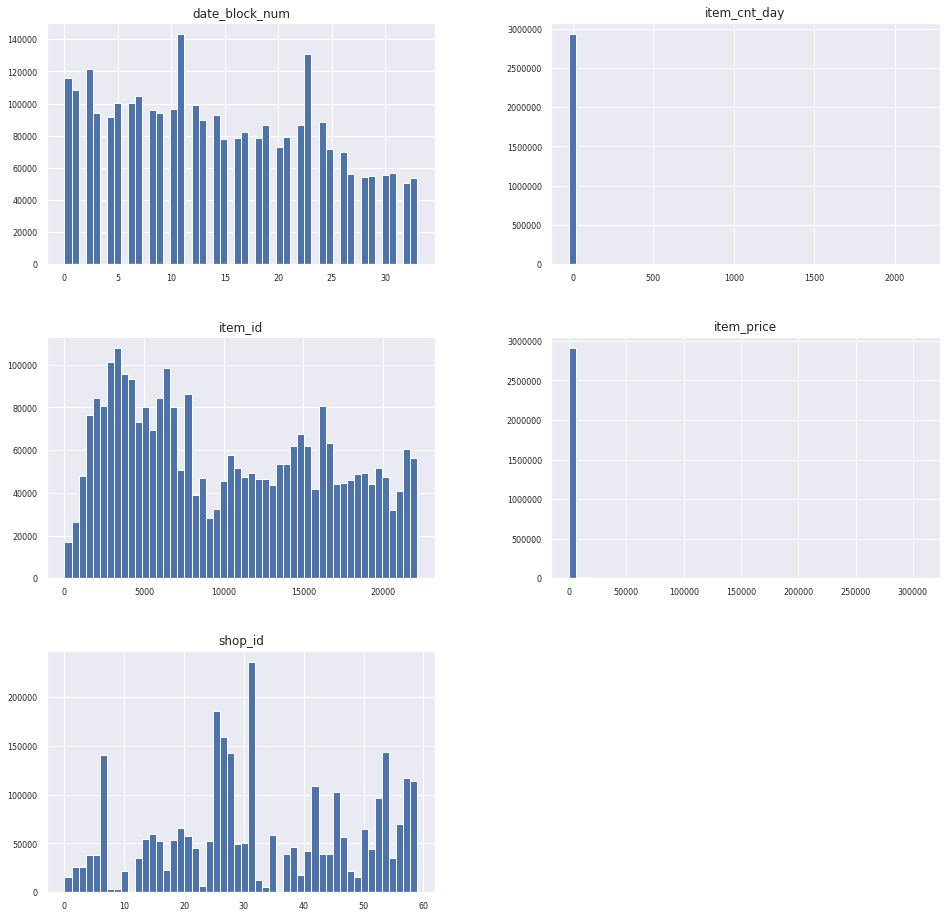

In [83]:
eda(train)
graph_insight(train)


----------Top-5- Record----------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB
None
-----------Data Types-----------
ID         int64
shop_id    int64
item_id    int64
dtype: object
----------Missing value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
----------Null value-----------
ID         0
shop_id    0
item_id    0
dtype: int64
----------Shape of Data----------
(214200, 3)
{dtype('int64')}


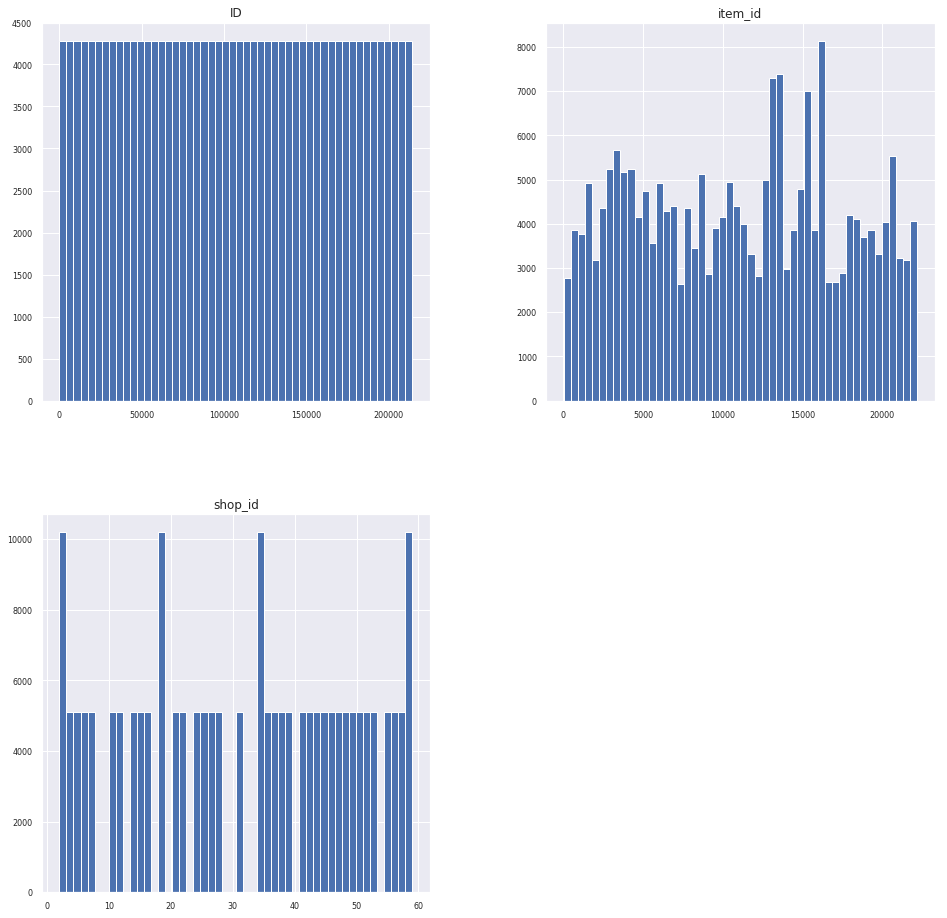

In [84]:
eda(test)
graph_insight(test)


In [85]:
train['date']=pd.to_datetime(train.date,format='%d.%m.%Y')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


#### Drop Duplicate 

In [96]:
train=train[~train.duplicated()]
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


### adding all item, shop combo to all months 

In [107]:
all_shop_item_df=pd.DataFrame(columns=train.columns)
all_shop_item_df=all_shop_item_df.append(train[0:1])
all_shop_item_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0


In [ ]:
%%time
all_shop_item_df=pd.DataFrame(columns=train.columns)
all_list=[]
for shop in train.shop_id.unique():
    print('one shop done')
    for month in [x for x in range(34)]:
        for item in train.item_id.unique():
            all_list.append([str(2013+month/12)+'-'+str(month%12)+'01',
             month,shop,item,-1,0])

one shop done


#### Checking if the item count day are all positive ?? 

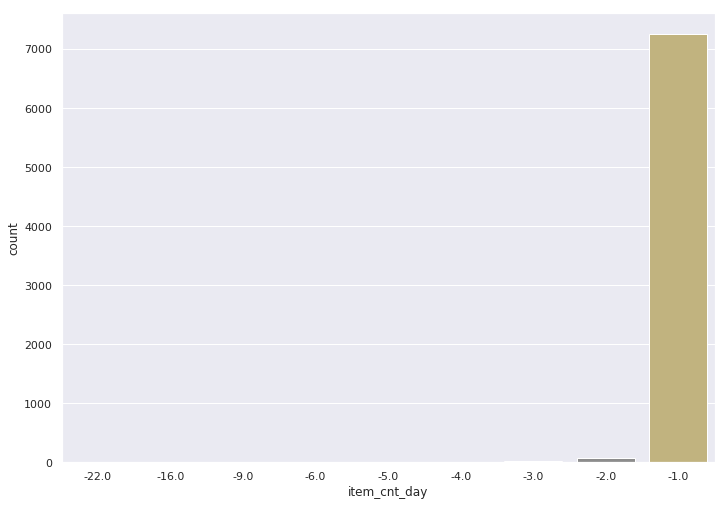

In [49]:
ax = sns.countplot(x="item_cnt_day", data=train[train['item_cnt_day']<0])

#### adding month to data frame 

In [50]:
train=train.groupby([ 'date_block_num','shop_id','item_id'],sort=True,as_index=False).agg({'item_cnt_day':sum,
                                                             'item_price': 'mean', 
                                                            'date': 'first'}) 

In [51]:
train['month']=train['date'].apply(lambda x : x.month)
train['year']=train['date'].apply(lambda x : x.year)
test['year']=[2015 for a in range (test.shape[0])]## Static for the test 
test['month']=[11 for a in range (test.shape[0])]## Static for the test 

In [52]:
test.head()

,ID,shop_id,item_id,year,month
0,0,5,5037,2015,11
1,1,5,5320,2015,11
2,2,5,5233,2015,11
3,3,5,5232,2015,11
4,4,5,5268,2015,11


In [53]:
train.shop_id.unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8, 10, 12, 13, 14, 15, 16, 18, 19, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 37, 38, 41, 42, 43,
       44, 45, 46, 47, 50, 51, 52, 53, 54, 56, 59,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36])

In [54]:
## joint to bring category id 
train=pd.merge(train, items, on='item_id',how='left',suffixes=('_left', '_right'))
train.head()



,date_block_num,shop_id,item_id,item_cnt_day,item_price,date,month,year,item_name,item_category_id
0,0,0,32,6.0,221.0,2013-01-03,1,2013,1+1,40
1,0,0,33,3.0,347.0,2013-01-03,1,2013,1+1 (BD),37
2,0,0,35,1.0,247.0,2013-01-31,1,2013,10 ЛЕТ СПУСТЯ,40
3,0,0,43,1.0,221.0,2013-01-31,1,2013,100 МИЛЛИОНОВ ЕВРО,40
4,0,0,51,2.0,128.5,2013-01-13,1,2013,100 лучших произведений классики (mp3-CD) (Dig...,57


In [55]:
## joint to bring category id to test
test=pd.merge(test, items, on='item_id',how='left',suffixes=('_left', '_right'))
test.head()


,ID,shop_id,item_id,year,month,item_name,item_category_id
0,0,5,5037,2015,11,"NHL 15 [PS3, русские субтитры]",19
1,1,5,5320,2015,11,ONE DIRECTION Made In The A.M.,55
2,2,5,5233,2015,11,"Need for Speed Rivals (Essentials) [PS3, русск...",19
3,3,5,5232,2015,11,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23
4,4,5,5268,2015,11,"Need for Speed [PS4, русская версия]",20


In [57]:
#super fucking awesome
pivot_df = train.pivot_table(index=['shop_id','item_category_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
pivot_df.head()


date_block_num              0     1    2    3    4    5    6    7    8    9   \
shop_id item_category_id                                                       
0       0                  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        1                  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2                 53.0  52.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        3                 28.0  24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        4                 16.0  22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

date_block_num           ...    24   25   26   27   28   29   30   31   32  \
shop_id item_category_id ...                                                 
0       0                ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        1                ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        2                ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        3                ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        4                ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

date_block_num             33  
shop_id item_category_id       
0       0                 0.0  
        1                 0.0  
        2                 0.0  
        3                 0.0  
        4                 0.0  

[5 rows x 34 columns]

In [58]:
pivot_df = pd.DataFrame(pivot_df.to_records())
pivot_df.head()

,shop_id,item_category_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,53.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,28.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,16.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
pivot_df.shop_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [60]:
pivot_df.item_category_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6, 11, 13, 14, 15, 19, 21, 22, 23, 25, 28,
       29, 30, 33, 35, 37, 38, 40, 41, 43, 45, 49, 55, 56, 57, 59, 60, 62,
       63, 64, 65, 67, 69, 70, 71, 72, 73, 75, 77, 81, 82, 83, 58,  7,  8,
       12, 16, 17, 20, 24, 32, 39, 42, 47, 61, 79, 80, 52, 46, 53, 66, 50,
        9, 48, 68, 18, 10, 51, 26, 27, 31, 34, 36, 44, 54, 74, 76, 78])

####  Too much to plot, group them by category and see the trend 

In [61]:
#super fucking awesome
pivot_category_df = train.pivot_table(index=['item_category_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
pivot_category_df = pd.DataFrame(pivot_category_df.to_records())
pivot_category_df.head()

,item_category_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1390.0,1190.0,1025.0,646.0,596.0,667.0,618.0,674.0,792.0,...,370.0,307.0,229.0,170.0,146.0,104.0,114.0,132.0,89.0,82.0
3,3,440.0,302.0,293.0,202.0,146.0,150.0,233.0,300.0,383.0,...,1398.0,834.0,773.0,746.0,667.0,559.0,603.0,975.0,1090.0,1059.0
4,4,251.0,220.0,226.0,160.0,175.0,176.0,179.0,140.0,86.0,...,10.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0


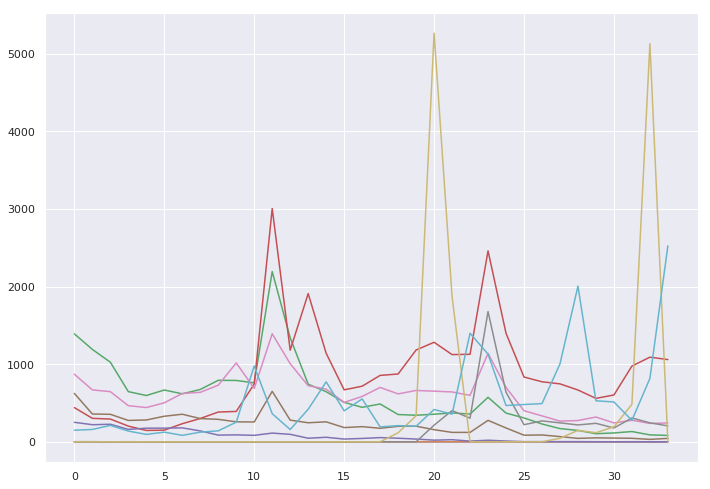

In [62]:
months=[a for a in range(34)]
for cat in pivot_category_df.item_category_id.unique()[:10]:
    sns.lineplot(x=months,y=pivot_category_df[pivot_category_df['item_category_id']==cat].drop(columns=['item_category_id']).values[0])


In [63]:
pivot_category_df.item_category_id.unique().shape

(84,)

In [64]:
sells_per_cat=train.groupby(['date_block_num','shop_id','item_category_id'],as_index = False)['item_cnt_day'].sum()
sells_per_cat.columns=['date_block_num','shop_id','item_category_id','item_cnt_category']
sells_per_cat.head()


,date_block_num,shop_id,item_category_id,item_cnt_category
0,0,0,2,53.0
1,0,0,3,28.0
2,0,0,4,16.0
3,0,0,5,28.0
4,0,0,6,65.0


####  plot all items sells of every item by month for all shops

In [65]:
train.shape

(1609124, 10)

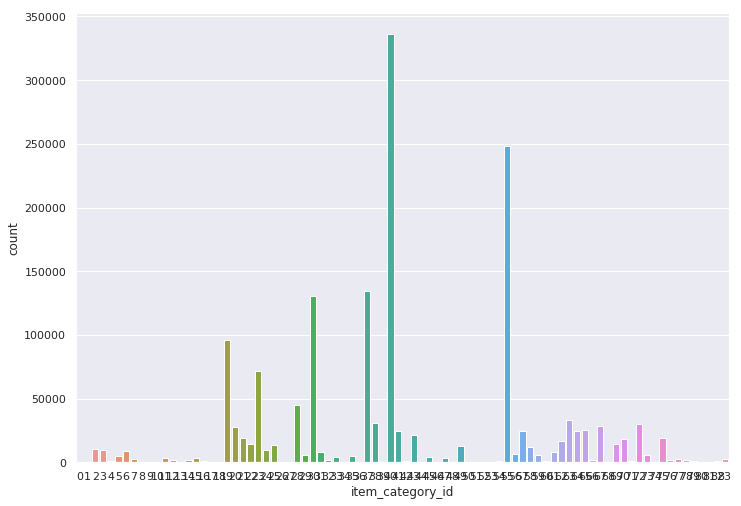

In [66]:
g = sns.countplot(x="item_category_id", data=train)


In [67]:
all_items_sells=train[['date_block_num','item_cnt_day','item_category_id']]
all_items_sells=all_items_sells.groupby(['date_block_num','item_category_id'],as_index=False).sum()
all_items_sells.head()

,date_block_num,item_category_id,item_cnt_day
0,0,0,1.0
1,0,1,1.0
2,0,2,1390.0
3,0,3,440.0
4,0,4,251.0


### Checking if all combo item, shop exist in train ?

In [43]:
test.head()

,ID,shop_id,item_id,item_name,item_category_id
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19
1,1,5,5320,ONE DIRECTION Made In The A.M.,55
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23
4,4,5,5268,"Need for Speed [PS4, русская версия]",20


In [44]:
test.shape

(214200, 5)

#### See the trend on prices level 

In [45]:
all_items_prices=train[['date_block_num','item_price','item_id']]
all_items_prices=all_items_prices.groupby(['date_block_num','item_id'],as_index=False).mean()
all_items_prices.head()

,date_block_num,item_id,item_price
0,0,19,28.000000
1,0,27,2325.000000
2,0,28,549.000000
3,0,29,2346.750000
4,0,32,335.042318


In [46]:
all_items_sells=train[['date_block_num','item_cnt_day','item_category_id']]
all_items_sells=all_items_sells.groupby(['date_block_num','item_category_id'],as_index=False).sum()
all_items_sells.head()

,date_block_num,item_category_id,item_cnt_day
0,0,0,1.0
1,0,1,1.0
2,0,2,1390.0
3,0,3,440.0
4,0,4,251.0


In [47]:
test.head()

,ID,shop_id,item_id,item_name,item_category_id
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19
1,1,5,5320,ONE DIRECTION Made In The A.M.,55
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23
4,4,5,5268,"Need for Speed [PS4, русская версия]",20


#### Split data to train and validation

In [48]:
validation = train[-1000:]
train = train[:-1000]

### try Xgboost 

In [ ]:
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

xg_gbm = xgb.XGBClassifier(max_depth=7, n_estimators=15, learning_rate=0.1,colsample_bytree=0.6)
(x_tr,y_tr)=(train[['shop_id','item_id','item_category_id']].values, train['item_cnt_day'].values)
X_tr, X_val=(validation[['shop_id','item_id','item_category_id']].values, validationxgboost fo['item_cnt_day'].values)
xg_gbm.fit(data.iloc[tr_ind].drop('Survived',axis=1).values,data.iloc[tr_ind].Survived.values)

scores.append((np.asarray(cv_scores)).mean())
plt.plot(estim,scores)


In [ ]:
True_labels=validation['item_price']

#### Step 1 : Item price imputation 


##### Forcasting last value from same price same shop

In [83]:
validation.shape

(1608124, 9)

In [84]:
validation=validation.reset_index(drop=True)

#### Very slow ! get the last median price of the categories in a dict better 

In [85]:
category_median= train[['item_category_id','item_price']].groupby(['item_category_id'],as_index=False).median()
category_median.head()

,item_category_id,item_price
0,0,93.0
1,1,215.5
2,2,2390.0
3,3,1690.0
4,4,299.0


In [86]:
last_item_price_same_shop= train[['shop_id','item_id','item_price']].groupby(['shop_id','item_id'],as_index=False).last()
last_item_price_same_shop.head()
#last_item_price_same_shop[(last_item_price_same_shop['shop_id']==0 )& (last_item_price_same_shop['item_id']==33 )]

,shop_id,item_id,item_price
0,0,30,265.0
1,0,31,434.0
2,0,32,221.0
3,0,33,347.0
4,0,35,247.0


In [87]:
last_item_price_all_shop= train[['item_id','item_price']].groupby(['item_id'],as_index=False).last()
last_item_price_all_shop.head()


,item_id,item_price
0,0,58.0
1,1,4490.0
2,2,58.0
3,3,58.0
4,4,58.0


In [14]:
## redo this 
'''
def get_last_price_same_shop(row):
    if last_item_price_same_shop[(last_item_price_same_shop['item_id']==row['item_id'])&(last_item_price_same_shop['shop_id']==row['shop_id'])].empty:
        return last_item_price_same_shop[(last_item_price_same_shop['item_id']==row['item_id'])&(last_item_price_same_shop['shop_id']==row['shop_id'])]['item_price']
    if last_item_price_all_shop[(last_item_price_all_shop['item_id']==row['item_id'])].shape[0]>0:
        return last_item_price_same_shop[(last_item_price_same_shop['item_id']==row['item_id'])]['item_price']
    if category_median[category_median['item_category_id']==row['item_category_id']].shape[0]>0:
        return category_median[category_median['item_category_id']==row['item_category_id']]['item_price']
    print('not found ')
    return 1
validation['item_price']=validation.apply(lambda x : get_last_price_same_shop(x),axis=1)
validation.head()'''

"\ndef get_last_price_same_shop(row):\n    if last_item_price_same_shop[(last_item_price_same_shop['item_id']==row['item_id'])&(last_item_price_same_shop['shop_id']==row['shop_id'])].shape[0]>0:\n        return last_item_price_same_shop[(last_item_price_same_shop['item_id']==row['item_id'])&(last_item_price_same_shop['shop_id']==row['shop_id'])]['item_price']\n    if last_item_price_all_shop[(last_item_price_all_shop['item_id']==row['item_id'])].shape[0]>0:\n        return last_item_price_same_shop[(last_item_price_same_shop['item_id']==row['item_id'])]['item_price']\n    if category_median[category_median['item_category_id']==row['item_category_id']].shape[0]>0:\n        return category_median[category_median['item_category_id']==row['item_category_id']]['item_price']\n    print('not found ')\n    return 1\nvalidation['item_price']=validation.apply(lambda x : get_last_price_same_shop(x),axis=1)\nvalidation.head()"

In [ ]:
#### Step 2 : item count prediction 